# Assignment 4 - Unsupervised Learning and More Supervised Learning

## *Lisa Sapozhnikov*
Netid:  *ls258*

## 1

### [30 points] Clustering

Clustering can be used to determine structure, assign group membership, and representing data through compression. Here you'll dive deeply into clustering exploring the impact of a number of algorithms on uniquely challenging clustering datasets. 

**(a)** Implement your own k-means algorithm. Demonstrate the efficacy of your algorithm on the `blobs` dataset from `scikit-learn` with 2 and 5 cluster centers. For each implementation rerun the k-means algorithm for values of k from 1 to 10 and for each plot the "elbow curve" where you plot the sum of square error. For each case, where is the elbow in the curve? Explain why.

**(b)** Explain in 1-2 sentences each (and at a very high level) how the following clustering techniques work and what distinguishes them from other clustering methods: (1) k-means, (2) agglomerative clustering, (3) Gaussian mixture models, (4) DBSCAN, and (5) spectral clustering

**(c)** For each of the clustering algorithms in (b) run each of them your choice of 4 of the 8 interesting datasets below. Tune the parameters in each model to achieve better performance. Plot the final result as a 4-by-5 subplot showing the performnace of each method on each dataset. Which methods work best/worst on each dataset and why?
- Aggregation.txt
- Compound.txt
- D31.txt
- flame.txt
- jain.txt
- pathbased.txt
- R15.txt
- spiral.txt

Each file has three columns: the first two are $x_1$ and $x_2$, then the third is a suggested cluster label (ignore this third column - do NOT include this in your analysis). *The data are from https://cs.joensuu.fi/sipu/datasets/*.

**ANSWER**

In [61]:
import numpy as np
import matplotlib.pyplot as plt

def has_converged(ck_prev, ck_curr):
    return set([tuple(ck) for ck in ck_prev]) == set([tuple(ck) for ck in ck_curr])

def make_clusters(X, ck_curr):
    clusters_dict = {}
    for i in range(len(X)):
        min_dist = np.inf
        center = X[i]
        center_index = 0
        index = 0
        for ck in ck_curr:
            dist = np.linalg.norm(ck-X[i])
            if dist < min_dist:
                min_dist = dist
                center = ck
                center_index = index
            index = index + 1
        try:
            #print(center_index)
            clusters_dict[center_index].append(X[i])
        except KeyError:
            clusters_dict[center_index] = [X[i]]
    return clusters_dict

def recalc_centers(clusters):
    ck_new = []
    for ck in clusters.keys():
        ck_new.append(np.mean(clusters[ck], axis = 0))
    return ck_new

def sum_squared_error(clusters):
    sse = 0
    for ck in clusters.keys():
        mean = np.mean(clusters[ck], axis=0)
        for x in clusters[ck]:
            sse = sse + np.power(np.linalg.norm(x - mean), 2);
    return sse

def cluster(X, K):
    ck_prev = X[np.random.choice(X.shape[0], K, replace=False), :]
    ck_curr = X[np.random.choice(X.shape[0], K, replace=False), :]
    while not has_converged(ck_prev, ck_curr):
        ck_prev = ck_curr
        # Reassign clusters
        clusters = make_clusters(X, ck_curr)
        # Recalculate centers
        ck_curr = recalc_centers(clusters)
    sse = sum_squared_error(clusters)
    return(ck_curr, clusters, sse)
    

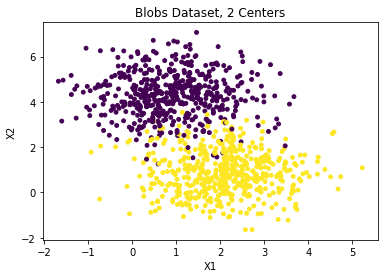

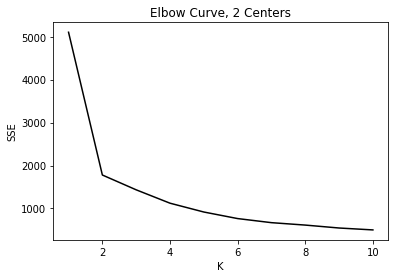

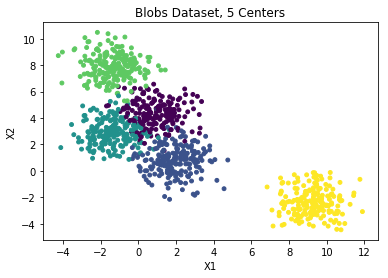

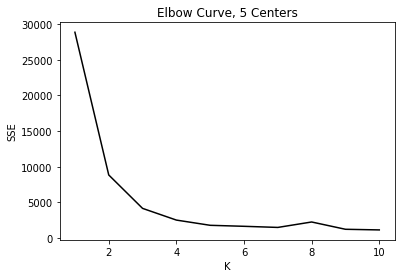

In [141]:
from sklearn.datasets.samples_generator import make_blobs

# 2 centers
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=0)
# print(X)
# print(y)
plt.scatter(X[:,0], X[:,1], s=15, c=y)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Blobs Dataset, 2 Centers')
plt.show()

k_arr = []
sse_arr = []

for i in range(10):
    k = i+1
    ck_curr, clusters, sse = cluster(X, k)
    k_arr.append(k)
    sse_arr.append(sse)
    
plt.plot(k_arr, sse_arr, '-k')
plt.xlabel('K')
plt.ylabel('SSE')
plt.title('Elbow Curve, 2 Centers')
plt.show()

#5 centers
X, y = make_blobs(n_samples=1000, centers=5, n_features=2, random_state=0)
plt.scatter(X[:,0], X[:,1], s=15, c=y)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Blobs Dataset, 5 Centers')
plt.show()

k_arr = []
sse_arr = []

for i in range(10):
    k = i+1
    ck_curr, clusters, sse = cluster(X, k)
    k_arr.append(k)
    sse_arr.append(sse)
    
plt.plot(k_arr, sse_arr, '-k')
plt.xlabel('K')
plt.ylabel('SSE')
plt.title('Elbow Curve, 5 Centers')
plt.show()

**(a)** The elbow method is an important analysis to avoid overfitting. It is important to fit a value of K high enough to accurately decreases the error, but not too high so as to falsley minimize the training error by treating each datapoint as its own cluster.

For the blob data generated with two centers, K=2 is the sharpest edge, or elbow, in the graph. This matches the actual number of clusters the data is generated with due to the fact that the clusters are very distinct.

For the blob data generated with five centers, K=3 is the sharpest edge, or elbow, in the graph. The elbow underestimates the true number of clusters in the data due to the fact that the is much overlap between the clusters. 

**(b)**

(1) **k-means**: The K-Means algorithm clusters data by trying to separate the samples into **k** groups of equal variance, minimizing the within-cluster sum-of-squares.

(2) **agglomerative clustering**: Agglomerative clustering performs hierarchical clustering with each observation starting in its own cluster, merging clusters together in accordance to a linkage criteria. Linkage criteria include minimizing the sum of squares within all clusters, and minimizing the average or maximum distance between observations of pairs of clusters.

(3) **Gaussian mixture models**: The Gaussian mixture model generalizes K-Means by assuming that all the data points are generated from a mixture of a finite number of Gaussian distributions with unknown parameters, using the covariance of the samples as well as the centers of the latent Gaussians to determine the clusters.

(4) **DBSCAN**: The DBSCAN algorithm views clusters as areas of high density separated by areas of low density, allowing clusters of any shape, as opposed to k-means which assumes that clusters are convex shaped. A cluster is a set of core samples (samples in a high-density region) and a set of non-core samples that are close to a core sample (but are not themselves core samples). 

(5) **spectral clustering**: SpectralClustering performs a low-dimension embedding of the affinity matrix between samples, followed by a K-Means in the low dimensional space.

/Users/lisasapozhnikov/anaconda3/lib/python3.6/site-packages/sklearn/manifold/spectral_embedding_.py:234: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/Users/lisasapozhnikov/anaconda3/lib/python3.6/site-packages/sklearn/manifold/spectral_embedding_.py:234: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


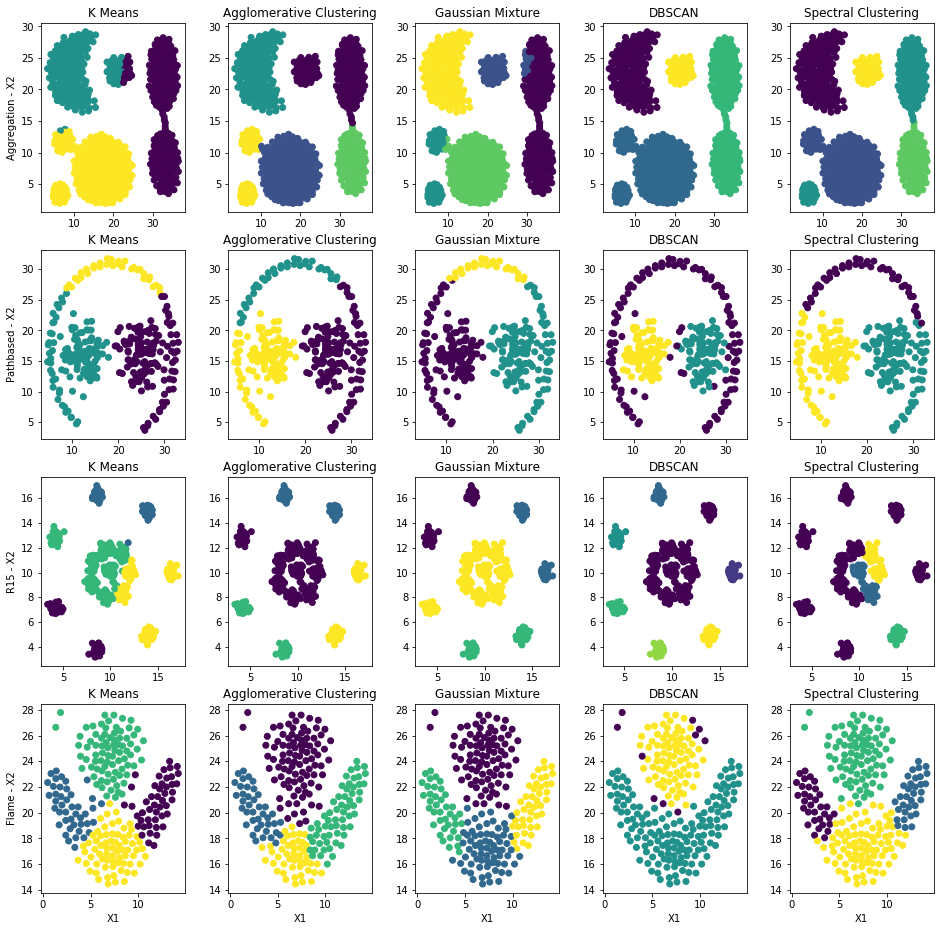

In [249]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, SpectralClustering
from sklearn.mixture import GaussianMixture

plt.close('all')

fig, axes = plt.subplots(4, 5, figsize=(16, 16))

# Aggregation
aggregation = np.loadtxt('data/aggregation.txt')[:,:2]

y_pred_kmeans1 = KMeans(n_clusters=3).fit_predict(aggregation)
axes[0,0].scatter(aggregation[:,0], aggregation[:,1], c=y_pred_kmeans1)
axes[0,0].set_ylabel('Aggregation - X2')
axes[0,0].set_title('K Means')

y_pred_ac1 = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward').fit_predict(aggregation)
axes[0,1].scatter(aggregation[:,0], aggregation[:,1], c=y_pred_ac1)
axes[0,1].set_title('Agglomerative Clustering')

gmm = GaussianMixture(n_components=5, covariance_type='full')
gmm.fit(aggregation)
y_pred_gmm1 = gmm.predict(aggregation)
axes[0,2].scatter(aggregation[:,0], aggregation[:,1], c=y_pred_gmm1)
axes[0,2].set_title('Gaussian Mixture')

y_pred_db1 = DBSCAN(eps=3, min_samples=10).fit_predict(aggregation)
axes[0,3].scatter(aggregation[:,0], aggregation[:,1], c=y_pred_db1)
axes[0,3].set_title('DBSCAN')

y_pred_sp1 = SpectralClustering(n_clusters=5, eigen_solver='arpack', affinity="nearest_neighbors").fit_predict(aggregation)
axes[0,4].scatter(aggregation[:,0], aggregation[:,1], c=y_pred_sp1)
axes[0,4].set_title('Spectral Clustering')

# Pathbased
pathbased = np.loadtxt('data/pathbased.txt')[:,:2]

y_pred_kmeans2 = KMeans(n_clusters=3).fit_predict(pathbased)
axes[1,0].scatter(pathbased[:,0], pathbased[:,1], c=y_pred_kmeans2)
axes[1,0].set_ylabel('Pathbased - X2')
axes[1,0].set_title('K Means')

y_pred_ac2 = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward').fit_predict(pathbased)
axes[1,1].scatter(pathbased[:,0], pathbased[:,1], c=y_pred_ac2)
axes[1,1].set_title('Agglomerative Clustering')

gmm = GaussianMixture(n_components=3, covariance_type='full')
gmm.fit(pathbased)
y_pred_gmm2 = gmm.predict(pathbased)
axes[1,2].scatter(pathbased[:,0], pathbased[:,1], c=y_pred_gmm2)
axes[1,2].set_title('Gaussian Mixture')

y_pred_db2 = DBSCAN(eps=2, min_samples=10).fit_predict(pathbased)
axes[1,3].scatter(pathbased[:,0], pathbased[:,1], c=y_pred_db2)
axes[1,3].set_title('DBSCAN')

y_pred_sp2 = SpectralClustering(n_clusters=3, eigen_solver='arpack', affinity="nearest_neighbors").fit_predict(pathbased)
axes[1,4].scatter(pathbased[:,0], pathbased[:,1], c=y_pred_sp2)
axes[1,4].set_title('Spectral Clustering')

# R15
r15 = np.loadtxt('data/r15.txt')[:,:2]

y_pred_kmeans3 = KMeans(n_clusters=4).fit_predict(r15)
axes[2,0].scatter(r15[:,0], r15[:,1], c=y_pred_kmeans3)
axes[2,0].set_ylabel('R15 - X2')
axes[2,0].set_title('K Means')

y_pred_ac3 = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward').fit_predict(r15)
axes[2,1].scatter(r15[:,0], r15[:,1], c=y_pred_ac3)
axes[2,1].set_title('Agglomerative Clustering')

gmm = GaussianMixture(n_components=4, covariance_type='full')
gmm.fit(r15)
y_pred_gmm3 = gmm.predict(r15)
axes[2,2].scatter(r15[:,0], r15[:,1], c=y_pred_gmm3)
axes[2,2].set_title('Gaussian Mixture')

y_pred_db3 = DBSCAN(eps=3, min_samples=10).fit_predict(r15)
axes[2,3].scatter(r15[:,0], r15[:,1], c=y_pred_db3)
axes[2,3].set_title('DBSCAN')

y_pred_sp3 = SpectralClustering(n_clusters=4, eigen_solver='arpack', affinity="nearest_neighbors").fit_predict(r15)
axes[2,4].scatter(r15[:,0], r15[:,1], c=y_pred_sp3)
axes[2,4].set_title('Spectral Clustering')

# Flame
flame = np.loadtxt('data/flame.txt')[:,:2]

y_pred_kmeans4 = KMeans(n_clusters=4).fit_predict(flame)
axes[3,0].scatter(flame[:,0], flame[:,1], c=y_pred_kmeans4)
axes[3,0].set_xlabel('X1')
axes[3,0].set_ylabel('Flame - X2')
axes[3,0].set_title('K Means')

y_pred_ac4 = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward').fit_predict(flame)
axes[3,1].scatter(flame[:,0], flame[:,1], c=y_pred_ac4)
axes[3,1].set_xlabel('X1')
axes[3,1].set_title('Agglomerative Clustering')

gmm = GaussianMixture(n_components=4, covariance_type='full')
gmm.fit(flame)
y_pred_gmm4 = gmm.predict(flame)
axes[3,2].scatter(flame[:,0], flame[:,1], c=y_pred_gmm4)
axes[3,2].set_xlabel('X1')
axes[3,2].set_title('Gaussian Mixture')

y_pred_db4 = DBSCAN(eps=1.3, min_samples=10).fit_predict(flame)
axes[3,3].scatter(flame[:,0], flame[:,1], c=y_pred_db4)
axes[3,3].set_xlabel('X1')
axes[3,3].set_title('DBSCAN')

y_pred_sp4 = SpectralClustering(n_clusters=4, eigen_solver='arpack', affinity="nearest_neighbors").fit_predict(flame)
axes[3,4].scatter(flame[:,0], flame[:,1], c=y_pred_sp4)
axes[3,4].set_xlabel('X1')
axes[3,4].set_title('Spectral Clustering')

fig.subplots_adjust(hspace=0.2, wspace=0.3)
plt.show()


**Aggregation**:

**Pathbased**:

**R15**:

**Flame**:

## 2

### [15 points] Visualizing and clustering digits with PCA and t-SNE

**(a)** Load the `scikit-learn` digits dataset. Apply PCA and reduce the data (with the associated cluster labels 0-9) into a 2-dimensional space. Plot the data with labels in this two dimensional space (labels can be colors, shapes, or using the actual numbers to represent the data - a legend should be provided).

**(b)** t-distributed stochastic neighborhood embedding (t-SNE) is a nonlinear dimensionality reduction technique that is particularly adept at embedding the data into lower 2 or 3 dimensional spaces. Apply t-SNE to the digits dataset and plot it in 2-dimensions (with associated cluster labels 0-9). You may need to adjust the parameters to get acceptable performance. You can read more about how to use t-SNE effectively [here](https://distill.pub/2016/misread-tsne/).

**(c)** Compare/contrast the performance of these two techniques. Which seemed to cluster the data best and why? *Note: You typically will not have labels available in most problems.*

**ANSWER**

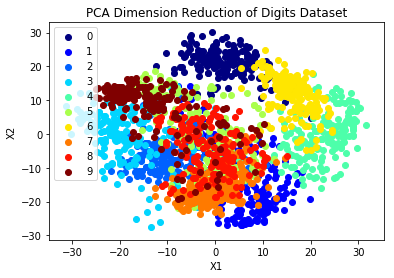

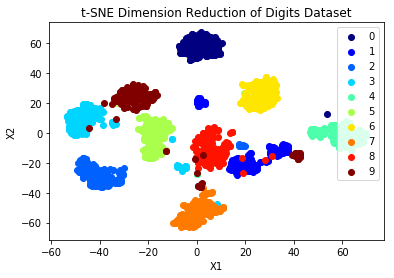

In [280]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

digits = load_digits()
pca = PCA(n_components=2)
x = pca.fit_transform(digits.data)

unique = list(set(digits.target))
colors = [plt.cm.jet(float(i)/max(unique)) for i in unique]
for i, u in enumerate(unique):
    xi = [x[j, 0] for j  in range(len(x)) if digits.target[j] == u]
    yi = [x[j, 1] for j  in range(len(x)) if digits.target[j] == u]
    plt.scatter(xi, yi, c=colors[i], label=str(u))

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('PCA Dimension Reduction of Digits Dataset')
plt.legend()
plt.show()

tsne = TSNE(n_components=2, init='pca', random_state=0)
x = tsne.fit_transform(digits.data)

unique = list(set(digits.target))
colors = [plt.cm.jet(float(i)/max(unique)) for i in unique]
for i, u in enumerate(unique):
    xi = [x[j, 0] for j  in range(len(x)) if digits.target[j] == u]
    yi = [x[j, 1] for j  in range(len(x)) if digits.target[j] == u]
    plt.scatter(xi, yi, c=colors[i], label=str(u))

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('t-SNE Dimension Reduction of Digits Dataset')
plt.legend()
plt.show()


## 3

### [25 points] PCA for compression

From the digits dataset, extract all the 5's. Your going to create a compressed version of one of an image.

**(a)** Plot a number of examples of the original images.

**(b)** Perform PCA on the data. Create a plot showing the fraction of variance explained as you incoporate from $1$ to $N$ components. 

**(c)** Select an image (from your dataset of 5's) that you will "compress" using PCA. Use the principal components extracted in (b) for data compression: choose the top $k$ principal components and represent the data using a subset of the total principal components. Choose a few values of $k$ that clearly show the difference in image reconstruction. Plot the original image, and 3 compressed versions with different levels of compression (i.e. using different numbers of principal components).

**(d)** How many principal components are required to well-approximate the data in (c)? How much compression is achieved in each case (express compression as the ratio of $k$ to the original dimension of the data $D$, so it ranges from $0$ to $1$). Comment on each case.

**ANSWER**

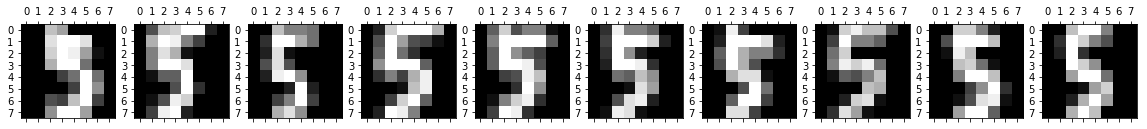

In [308]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

digits = load_digits()
digits5 = digits.data[digits.target==5]
digits5_target = digits.target[digits.target==5]

ind = 0
plt.close('all')

fig, axes = plt.subplots(1, 10, figsize=(20, 20))

for i in range(10):
    axes[i].matshow(digits.images[digits.target==5][i])
    
plt.show()


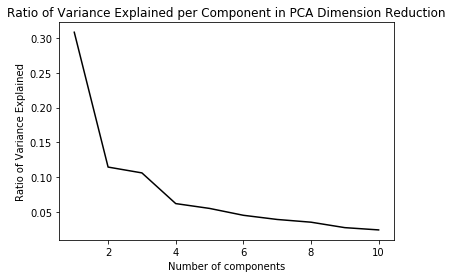

In [307]:
pca = PCA(n_components=10)
x = pca.fit_transform(digits5)
ratio_var_explained = pca.explained_variance_ratio_

plt.plot(np.linspace(1,10,10), ratio_var_explained, '-k')
plt.xlabel('Number of components')
plt.ylabel('Ratio of Variance Explained')
plt.title('Ratio of Variance Explained per Component in PCA Dimension Reduction')
plt.show()

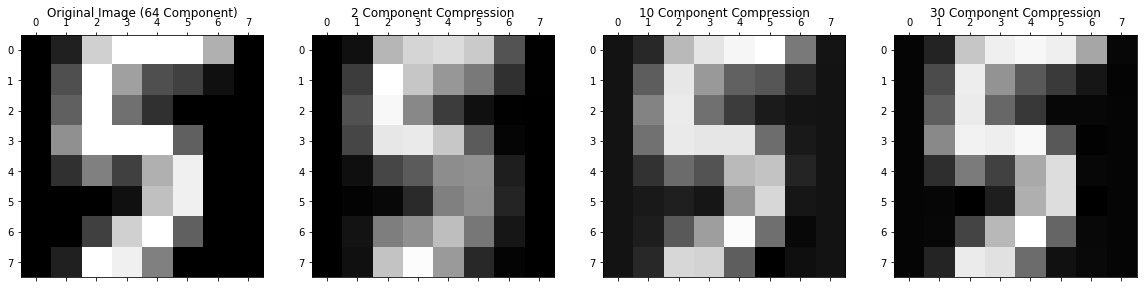

In [320]:
plt.close('all')
fig, axes = plt.subplots(1, 4, figsize=(20, 20))

image_original = digits.images[digits.target==5][3]
axes[0].matshow(image_original)
axes[0].set_title('Original Image (64 Component)')

pca = PCA(n_components=2)
x = pca.fit_transform(digits5)
image2 = pca.inverse_transform(x)
axes[1].matshow(image2[3].reshape(8,8))
axes[1].set_title('2 Component Compression')

pca = PCA(n_components=10)
x = pca.fit_transform(digits5)
image10 = pca.inverse_transform(x)
axes[2].matshow(image10[3].reshape(8,8))
axes[2].set_title('10 Component Compression')


pca = PCA(n_components=30)
x = pca.fit_transform(digits5)
image30 = pca.inverse_transform(x)
axes[3].matshow(image30[3].reshape(8,8))
axes[3].set_title('30 Component Compression')
plt.show()

## 4

### [15 points] Build and test your own Neural Network

There is no better way to understand how one of the core techniques of modern machine learning works than to build a simple version of it yourself. In this exercise you will construct and apply your own neural network classifier.

**(a)** Create a neural network class that follows the `scikit-learn` classifier convention by implementing `fit`, `predict`, and `predict_proba` methods. Your `fit` method should run backpropagation on your training data using stochastic gradient descent. Assume the activation function is a sigmoid.

**(b)** Create a training and test dataset using `sklearn.datasets.make_moons(N, noise=0.20)`, where $N_{train} = 500$ and $N_{test} = 100$. Train and test your model on this dataset. Your network should have two input nodes, two hidden layers with five nodes each and one output node. In two subplots, plot the training data on one, and the test data on the other. On each plot, also plot the decision boundary from your neural network trained on the training data. Report your performance on the test data with an ROC.

**(c)** Suggest at least two ways in which you neural network could be improved.

**(d)** [5 extra credit bonus points] Adjust the parameters in your model in (b) and choose your parameters to improve performance.

**ANSWER**

In [334]:
from random import seed
from random import random
from math import exp
 

class NeuralNetwork:
    
    def __init__(self, n_inputs, n_hidden_1, n_hidden_2, n_outputs):
        network = list()
        hidden_layer1 = [{'weights':[random() for i in range(n_inputs + 1)]} for i in range(n_hidden_1)]
        network.append(hidden_layer1)
        hidden_layer2 = [{'weights':[random() for i in range(n_hidden_1 + 1)]} for i in range(n_hidden_2)]
        network.append(hidden_layer2)
        output_layer = [{'weights':[random() for i in range(n_hidden_2 + 1)]} for i in range(n_outputs)]
        network.append(output_layer)
        self.network = network
        
    def activate(self, weights, inputs):
        activation = weights[-1]
        for i in range(len(weights)-1):
            activation += weights[i] * inputs[i]
        return activation
    
    def sigmoid(self, activation):
        return 1.0 / (1.0 + exp(-activation))
        
    def forward_propagate(self, sample):
        inputs = sample
        for layer in self.network:
            new_inputs = []
            for neuron in layer:
                activation = self.activate(neuron['weights'], inputs)
                neuron['output'] = self.sigmoid(activation)
                new_inputs.append(neuron['output'])
            inputs = new_inputs
        return inputs

In [336]:
network = NeuralNetwork(2, 5, 5, 1)
# for layer in network.network:
# 	print(layer)
    
output = network.forward_propagate([1,0])
print(output)

[0.9291083218965753]
